# Creacion de Segmentos por Colores por medio de aarchivo .KML

## Librerias

Cargamos las librerias que vamos a usar en el código.

In [3]:
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
import folium
from IPython.display import IFrame
from IPython.display import display
from shapely.geometry import LineString
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from ipywidgets import Dropdown
from ipywidgets import interact
import numpy as np
import time
import matplotlib.pyplot as plt

fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled by default


## Apertura de Archivo .KML
Abrimos el archivo y vemos las diferentes capas que tiene el mapa

In [4]:
# Abre el archivo KML y lista las capas disponibles
filename = "FORUM8 Rally Japan 2024.kml"
layers = fiona.listlayers(filename)

# Cargar el archivo KML con geopandas
driver = "KML"

# Función para actualizar la capa y cargar los datos
def update_layer(selected_layer):
    global gdf
    global layer
    gdf = gpd.read_file(filename, driver=driver, layer=selected_layer)
    layer = selected_layer
    print(selected_layer)
    

# Crear un desplegable interactivo con las capas disponibles
interact(update_layer, selected_layer=layers);


interactive(children=(Dropdown(description='selected_layer', options=('Shakedown', 'Section 1', 'Sections 2, 3…

## Abrimos el archivo KML como geopandas y vemos la información de la capa

## Convertir a crs 
Nos permite medir la distancia de forma correcta

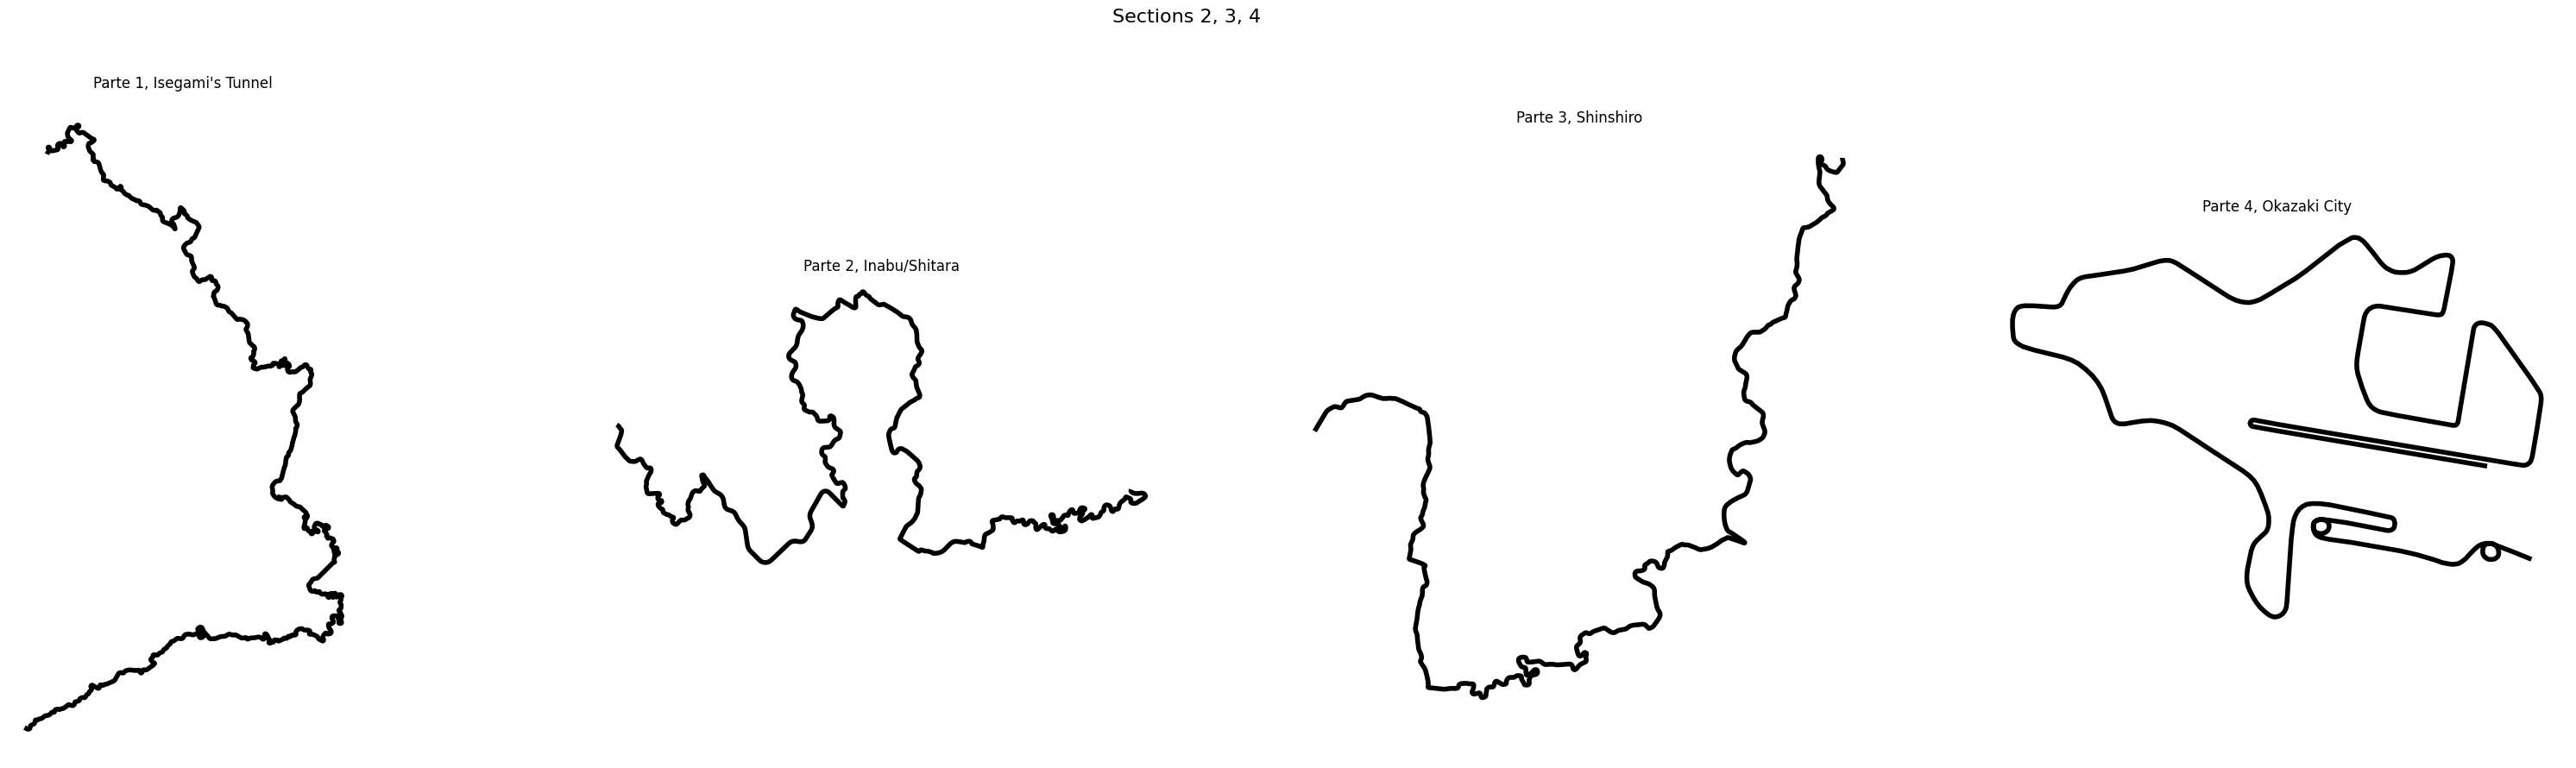

In [9]:
# Transformar a un CRS proyectado (por ejemplo, UTM) para calcular el centroide correctamente
# Usaremos el EPSG:3857 (Web Mercator) para esto
gdf_projected = gdf.to_crs(epsg=3857)

# Ahora calcula el centro de los datos geográficos en el CRS proyectado
center = [
    gdf_projected.geometry.centroid.to_crs(epsg=4326).y.mean(),  # Latitud
    gdf_projected.geometry.centroid.to_crs(epsg=4326).x.mean()   # Longitud
]


gdf_list = [gdf.iloc[[i]] for i in range(len(gdf))]

fig, axs = plt.subplots(1, len(gdf_list), figsize=(10 * len(gdf_list), 10 ))
fig.suptitle(layer, fontsize=16)

if len(gdf_list) == 1:
    gdf_list[0].plot(ax=axs, color="black", lw=4)
    axs.set_title(f"Seccion {1}, {gdf_list[0].iloc[0]['Name']}")
    axs.axis("off")
else:
    for i, gdf_part in enumerate(gdf_list):
        gdf_list[i].plot(ax=axs[i], color="black", lw=4)
        axs[i].set_title(f"Parte {i+1}, {gdf_list[i].iloc[0]['Name']}")
        axs[i].axis("off")

plt.show()

## Crear un mapa para ver la capa


In [10]:
Names = []
for i in range(len(gdf_list)):
    Names.append(gdf_list[i]["Name"].iloc[0])
    
    
# Función para actualizar la capa y cargar los datos
def update_section(selected_section):
    global gdf
    global name
    gdf = next(gdf_part for gdf_part in gdf_list if gdf_part["Name"].iloc[0] == selected_section)
    name = selected_section

# Crear un desplegable interactivo con las capas disponibles
interact(update_section, selected_section=Names);

interactive(children=(Dropdown(description='selected_section', options=("Isegami's Tunnel", 'Inabu/Shitara', '…

Longitud del tramo: 19.31 Km


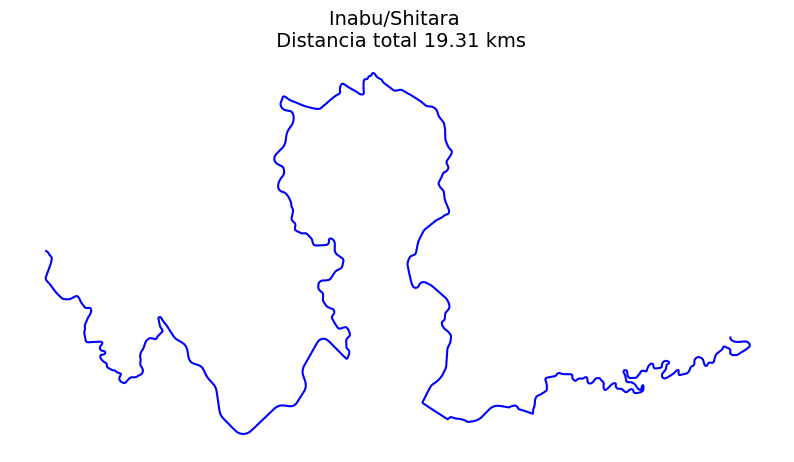

In [11]:
# Transformar a un CRS proyectado (por ejemplo, UTM o Web Mercator EPSG:3857)
gdf_projected = gdf.to_crs(epsg=3099)

# Calcular la longitud de cada tramo en metros
gdf_projected['length_m'] = gdf_projected.length

# Convertir la longitud a kilómetros
gdf_projected['length_km'] = gdf_projected['length_m'] / 1000

# Mostrar las longitudes en kilómetros
longitud_total = gdf_projected['length_km'].iloc[0]

print(f"Longitud del tramo: {gdf_projected['length_km'].iloc[0]:.2f} Km")  # 'name' es un ejemplo de columna, cámbialo según tus datos  



# Crear una figura y un eje con matplotlib
fig, ax = plt.subplots(figsize=(10, 10))

# Plotea las geometrías usando geopandas
gdf.plot(ax=ax, color='blue', edgecolor='black')

# Personalizar el gráfico
ax.set_title(f"{name} \n Distancia total {longitud_total:.2f} kms", fontsize=14)
ax.set_xlabel("Longitud", fontsize=10)
ax.set_ylabel("Latitud", fontsize=10)
ax.axis("off")
plt.show()




# Programa Principal

## Leyenda de Estados del Track

### Automática

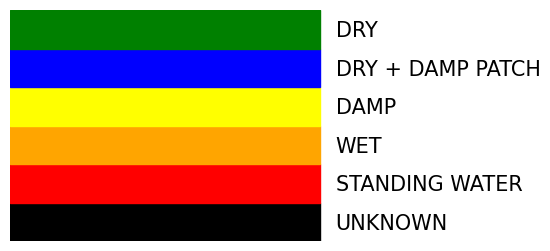

In [24]:
colors = ["green","blue","yellow","orange","red","black"]
significados = ["Dry", "Dry + Damp Patch", "Damp", "Wet","Standing Water", "Unknown"]
tramos_colores = [2,1,3,4,5,6]

color_dict = {i+1: colors[i] for i in range(len(colors))}
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('off')  # Ocultar los ejes
# Dibujar cada color y su significado
for i, (color, significado) in enumerate(reversed(list(zip(colors, significados)))):
    ax.add_patch(plt.Rectangle((0, i), 2, 1, color=color))  # Rectángulo con el color
    ax.text(2.1, i+0.45, significado.upper(), va='center', fontsize=15,)  # Texto con el significado

# Ajustar el gráfico
plt.xlim(0, 3)
plt.ylim(0, len(colors))
plt.show()

### Manual

In [7]:
import matplotlib
import ipywidgets as widgets
import matplotlib.pyplot as plt

# Inicializar los colores y significados vacíos
colors = []
significados = []

# Crear widgets para agregar colores y significados
color_selector = widgets.ColorPicker(value='green', description='Color:')  # Selector de color
significado_text = widgets.Text(value='', description='Significado:', placeholder='Introduce el significado')

# Función para agregar color y significado
def agregar_color_significado(b):
    color = color_selector.value
    significado = significado_text.value
    
    if significado != '':
        # Añadir color y significado a las listas
        colors.append(color)
        significados.append(significado)
        
        # Graficar los colores y significados
        graficar_colores_significados()

        # Limpiar el campo de texto para el siguiente color/significado
        significado_text.value = ''
        # Actualizar las listas desplegables para eliminar colores
        actualizar_lista_eliminar()

    else:
        print("Por favor, ingresa un significado para el color.")

# Función para graficar los colores y significados
def graficar_colores_significados():
    # Cerrar la figura anterior si existe
    plt.close()

    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.axis('off')  # Ocultar los ejes

    # Dibujar cada color y su significado
    for i, (color, significado) in enumerate(reversed(list(zip(colors, significados)))):  # Reversed para mantener el orden de adición
        ax.add_patch(plt.Rectangle((0, i), 2, 1, color=color))  # Rectángulo con el color
        ax.text(2.1, i + 0.45, significado.upper(), va='center', fontsize=15,)  # Texto con el significado

    # Ajustar el gráfico
    plt.xlim(0, 3)
    plt.ylim(0, len(colors))
    plt.show()

# Función para eliminar un color por su valor
def eliminar_color(b):
    selected_color = eliminar_selector.value
    if selected_color in colors:
        index = colors.index(selected_color)
        # Eliminar el color y su significado asociado
        colors.pop(index)
        significados.pop(index)
        print(f"Color y su significado con color '{selected_color}' eliminados.")
    else:
        print(f"No se encontró el color '{selected_color}'.")

    # Actualizar el gráfico y la lista de colores para eliminar
    graficar_colores_significados()
    actualizar_lista_eliminar()

# Función para actualizar las listas desplegables de eliminación
def actualizar_lista_eliminar():
    # Actualizar las opciones de la lista de eliminación solo con colores
    eliminar_selector.options = colors

# Widgets para eliminar un color
eliminar_selector = widgets.Dropdown(description='Eliminar Color:', options=[])
boton_eliminar = widgets.Button(description="Eliminar Color")
boton_eliminar.on_click(eliminar_color)

# Crear un botón para agregar color y significado
boton_agregar_color_significado = widgets.Button(description="Agregar Color y Significado")
boton_agregar_color_significado.on_click(agregar_color_significado)

# Mostrar widgets para agregar y eliminar colores y significados
display(color_selector, significado_text, boton_agregar_color_significado,
        eliminar_selector, boton_eliminar)


ColorPicker(value='green', description='Color:')

Text(value='', description='Significado:', placeholder='Introduce el significado')

Button(description='Agregar Color y Significado', style=ButtonStyle())

Dropdown(description='Eliminar Color:', options=(), value=None)

Button(description='Eliminar Color', style=ButtonStyle())

In [ ]:
# Definir los colores y significados
# colors = ["green", "blue", "yellow", "orange", "red", "black"]
# significados = ["Dry", "Dry + Damp Patch", "Damp", "Wet", "Standing Water", "Unknown"]

color_dict = {i + 1: colors[i] for i in range(len(colors))}

# Lista de opciones de significados
significados_opciones = [significado for significado in significados]

# Widgets para seleccionar el inicio y el final del rango total
mensaje_inicio_total = widgets.Label(value="Selecciona el Inicio del Rango Total:")
punto_inicio_total = widgets.IntText(value=0, description='Inicio Total:')

mensaje_fin_total = widgets.Label(value="Selecciona el Final del Rango Total:")
punto_fin_total = widgets.IntText(value=gdf_projected.length, description='Fin Total:')

# Widget para seleccionar el tamaño de la sección
mensaje_seccion_length = widgets.Label(value="Selecciona el tamaño de cada sección:")
secciones_length_selector = widgets.IntText(value=500, description='Tamaño Sección:')

# Widgets para seleccionar el inicio, fin y estado de cada tramo
mensaje_inicio_tramo = widgets.Label(value="Selecciona el Inicio del Tramo:")
punto_inicial = widgets.IntText(value=0, description='Inicio:')

mensaje_fin_tramo = widgets.Label(value="Selecciona el Final del Tramo:")
punto_final = widgets.IntText(value=500, description='Fin:')

mensaje_status_tramo = widgets.Label(value="Selecciona el estado del Tramo:")
color_selector = widgets.Dropdown(
    options=significados_opciones,
    description='Status:',
    value=significados[0]  # valor por defecto
)

# Lista para almacenar los tramos y colores seleccionados
tramos = []
tramos_colores = []

# Variable para controlar el estado del proceso
rango_total_definido = False

# Función para iniciar el proceso, activando el primer paso
def iniciar_proceso(b):
    global rango_total_definido
    # Verificar si el rango total ha sido definido correctamente
    inicio_total = punto_inicio_total.value
    fin_total = punto_fin_total.value

    if inicio_total < fin_total:
        print(f"Rango Total definido: Inicio {inicio_total} - Fin {fin_total}")
        rango_total_definido = True
        # Desactivar la interfaz de selección del rango total
        punto_inicio_total.disabled = True
        punto_fin_total.disabled = True
        # Mostrar el formulario para agregar tramos, manteniendo el valor del inicio actual
        punto_inicial.value = inicio_total  # Mantener el valor del inicio total al pasar a la sección de tramos
        # Calcular el punto final inicial (inicio + tamaño sección)
        punto_final.value = inicio_total + secciones_length_selector.value
        display(mensaje_inicio_tramo, punto_inicial, mensaje_fin_tramo, punto_final, mensaje_status_tramo, color_selector, boton_agregar)
    else:
        print("Error: El punto inicial debe ser menor que el punto final para el rango total.")

# Función para agregar un tramo
def agregar_tramo(b):
    global rango_total_definido
    secciones_length = secciones_length_selector.value  # Obtener el valor actualizado de secciones_length
    if not rango_total_definido:
        print("Primero define el rango total.")
        return
    
    # Obtener los valores seleccionados
    inicio = punto_inicial.value
    fin = punto_final.value
    significado = color_selector.value

    # Obtener el índice del significado seleccionado
    color_index = significados.index(significado)
    
    # Validar que el tramo sea válido (inicio < fin) y que no se pase del rango total
    if inicio < fin and fin <= punto_fin_total.value:
        tramos.append((inicio, fin))
        tramos_colores.append(color_dict[color_index + 1])
        print(f"Tramo agregado: ({inicio}, {fin}) con color: {significados[color_index]}")

        # Actualizar el valor de 'Inicio' para el siguiente tramo
        punto_inicial.value = fin
        
        # Calcular el punto final del siguiente tramo basado en el tamaño de la sección
        punto_final.value = fin + secciones_length
        
        # Asegurarse de que el final del tramo no exceda el valor máximo (punto_fin_total)
        if punto_final.value > punto_fin_total.value:
            punto_final.value = punto_fin_total.value
        
    else:
        print("Error: El punto inicial debe ser menor que el punto final y no debe exceder el rango total.")

    # Detener si se llega o sobrepasa el fin del rango total
    if punto_inicial.value >= punto_fin_total.value:
        print("Tramos Obtenidos, calculando...")
        boton_agregar.disabled = True  # Desactivar el botón una vez alcanzado el fin

# Botón para agregar tramos
boton_agregar = widgets.Button(description="Agregar Tramo")
boton_agregar.on_click(agregar_tramo)

# Botón para iniciar el proceso y definir el rango total
boton_iniciar = widgets.Button(description="Definir Rango Total")
boton_iniciar.on_click(iniciar_proceso)

# Mostrar los widgets para definir el rango total y tamaño de sección
display(mensaje_inicio_total, punto_inicio_total, mensaje_fin_total, punto_fin_total, mensaje_seccion_length, secciones_length_selector, boton_iniciar)


Label(value='Selecciona el Inicio del Rango Total:')

IntText(value=0, description='Inicio Total:')

Label(value='Selecciona el Final del Rango Total:')

IntText(value=11624, description='Fin Total:')

Label(value='Selecciona el tamaño de cada sección:')

IntText(value=500, description='Tamaño Sección:')

Button(description='Definir Rango Total', style=ButtonStyle())

Rango Total definido: Inicio 0 - Fin 5000


Label(value='Selecciona el Inicio del Tramo:')

IntText(value=0, description='Inicio:')

Label(value='Selecciona el Final del Tramo:')

IntText(value=500, description='Fin:')

Label(value='Selecciona el estado del Tramo:')

Dropdown(description='Status:', options=('Dry', 'Dry + Damp Patch', 'Damp', 'Wet', 'Standing Water', 'Unknown'…

Button(description='Agregar Tramo', style=ButtonStyle())

Tramo agregado: (0, 500) con color: Dry
Tramo agregado: (500, 1500) con color: Wet
Tramo agregado: (1500, 2000) con color: Standing Water
Tramo agregado: (2000, 2500) con color: Dry + Damp Patch
Tramo agregado: (2500, 3000) con color: Wet
Tramo agregado: (3000, 3500) con color: Dry
Tramo agregado: (3500, 4000) con color: Unknown
Tramo agregado: (4000, 4500) con color: Dry + Damp Patch
Tramo agregado: (4500, 5000) con color: Wet
Tramos Obtenidos, calculando...


In [57]:

# Supongo que gdf_projected, tramos, tramos_colores y color_dict ya están definidos
labels = []
Titulo_Leyenda = "Segmentos de 500 m"
Titulo_Grafico = gdf_projected["Name"].iloc[0]
show_letters = True

# Bucle para cada geometría en el GeoDataFrame
for line in gdf_projected.geometry:
    segments = []
    if line.geom_type == 'LineString':  # Verificar que la geometría sea una línea
        total_length = line.length  # Longitud total de la línea en metros
        if punto_final.value > total_length:
            finish_point = total_length  # Asegurarse de no exceder la longitud total

        if tramos:
            num_segments = len(tramos)  
            print(f"Numero de segmentos: {num_segments}")
        for i in range(num_segments):
            segment_start_dist = tramos[i][0]
            segment_end_dist = tramos[i][1]

            print(f"Inicio Segmento: {segment_start_dist}, Fin Segmento: {segment_end_dist}")
            labels.append(f"{segment_start_dist} - {segment_end_dist} m")

            # Interpolar los puntos de inicio y fin del segmento
            start_point_geom = line.interpolate(segment_start_dist)
            end_point_geom = line.interpolate(segment_end_dist)

            # Interpolar puntos adicionales entre start_point_geom y end_point_geom
            num_points = 20000  # Número de puntos adicionales para una mejor interpolación
            interpolated_points = [line.interpolate(segment_start_dist + j * (segment_end_dist - segment_start_dist) / num_points) for j in range(num_points + 1)]

            # Crear un segmento de línea con los puntos interpolados
            segment = LineString(interpolated_points)
            segments.append(segment)

        gdf_segments = gpd.GeoDataFrame(geometry=segments)

        # Crear un mapa de colores para diferenciar cada segmento usando la lista tramos_colores
        cmap = tramos_colores

        # Crear una figura y un eje para graficar
        fig, ax = plt.subplots(figsize=(20, 16))

        # Iterar sobre cada segmento y graficarlo con un color diferente
        for i, segment in enumerate(gdf_segments.geometry):
            color = cmap[i]  # Obtener un color del mapa de colores
            gpd.GeoSeries([segment]).plot(ax=ax, color=color, linewidth=5)

        # Configurar el eje y mostrar el gráfico
        ax.set_title(f"{Titulo_Grafico}", fontsize=16)
        ax.set_xlabel("Coordenadas X", fontsize=12)
        ax.set_ylabel("Coordenadas Y", fontsize=12)

        # Crear una lista de parches para la leyenda usando color_dict
        patches = [mpatches.Patch(color=color_dict[key], label=f'{significados[ii]}') for ii, key in enumerate(color_dict)]

        # Añadir la leyenda al gráfico
        # ax.legend(handles=patches, title=Titulo_Leyenda, fontsize=16, title_fontsize=18, bbox_to_anchor=(1.15, 0.5), loc='center left')
        ax.legend(handles=patches, title=Titulo_Leyenda, fontsize=16, title_fontsize=18, loc = "upper left" )

        # Función para evitar el solapamiento de las etiquetas y ajustar dentro de la caja
        def adjust_label_position(x, y, offset_x, offset_y, ax):
            # Obtener los límites del gráfico
            ax_lim_x = ax.get_xlim()
            ax_lim_y = ax.get_ylim()

            # Si está cerca del borde derecho, mover hacia la izquierda
            if x + offset_x > ax_lim_x[1]:
                offset_x = -20  # Mover hacia la izquierda

            # Si está cerca del borde superior, mover hacia abajo
            if y + offset_y > ax_lim_y[1]:
                offset_y = -20  # Mover hacia abajo

            # Si está cerca del borde izquierdo, mover hacia la derecha
            if x + offset_x < ax_lim_x[0]:
                offset_x = 20  # Mover hacia la derecha

            # Si está cerca del borde inferior, mover hacia arriba
            if y + offset_y < ax_lim_y[0]:
                offset_y = 20  # Mover hacia arriba

            # Verificar si la etiqueta se sale de los márgenes y ajustarla
            if x + offset_x < ax_lim_x[0] + 10:
                offset_x = 10  # Asegurarse de que no se salga por la izquierda
            if y + offset_y < ax_lim_y[0] + 10:
                offset_y = 10  # Asegurarse de que no se salga por la parte inferior
            if x + offset_x > ax_lim_x[1] - 10:
                offset_x = -10  # Asegurarse de que no se salga por la derecha
            if y + offset_y > ax_lim_y[1] - 10:
                offset_y = -10  # Asegurarse de que no se salga por la parte superior

            return offset_x, offset_y

        if show_letters:
            # Agregar etiquetas solo en el inicio de cada segmento
            for i in range(num_segments):
                segment_start_dist = tramos[i][0]

                # Interpolar los puntos de inicio del segmento
                start_point_geom = line.interpolate(segment_start_dist)

                # Desplazar la etiqueta ligeramente para evitar solaparse con la línea
                offset_x = 20  # Desplazar en el eje X
                offset_y = 20  # Desplazar en el eje Y

                # Ajustar la posición de la etiqueta para evitar solapamientos
                offset_x, offset_y = adjust_label_position(start_point_geom.x, start_point_geom.y, offset_x, offset_y, ax)

                # Posicionar las etiquetas en el gráfico solo en el punto de inicio de cada segmento
                ax.text(start_point_geom.x + offset_x, start_point_geom.y + offset_y,
                        f"{segment_start_dist} m", fontsize=15, ha='center', color='black')

                if i == num_segments - 1:
                    # Ajustar la posición de la etiqueta del último segmento
                    offset_x, offset_y = adjust_label_position(end_point_geom.x, end_point_geom.y, offset_x, offset_y, ax)
                    ax.text(end_point_geom.x + offset_x, end_point_geom.y + offset_y,
                            f"{segment_end_dist} m", fontsize=15, ha='center', color='black')

        # Eliminar los ejes pero mantener el cuadro
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Asegurar que haya un pequeño margen alrededor de todo el gráfico
        ax.margins(0.05)

        plt.show()


Numero de segmentos: 9
Inicio Segmento: 0, Fin Segmento: 500
Inicio Segmento: 500, Fin Segmento: 1500
Inicio Segmento: 1500, Fin Segmento: 2000
Inicio Segmento: 2000, Fin Segmento: 2500
Inicio Segmento: 2500, Fin Segmento: 3000
Inicio Segmento: 3000, Fin Segmento: 3500
Inicio Segmento: 3500, Fin Segmento: 4000
Inicio Segmento: 4000, Fin Segmento: 4500
Inicio Segmento: 4500, Fin Segmento: 5000


# TESTS

In [58]:
# Guardar la figura como una imagen
fig.savefig('map.png')

In [ ]:
# Cargar la imagen guardada
image_path = 'map.png'  # Reemplaza con la ruta de tu imagen
image = plt.imread(image_path)

# Crear una figura y mostrar la imagen
fig, ax = plt.subplots()
ax.imshow(image)

# Función para manejar los clics del mouse
def on_click(event):
    if event.xdata and event.ydata:  # Asegúrate de que el clic esté dentro del área de la imagen
        # Añadir un círculo donde se hizo clic
        circle = plt.Circle((event.xdata, event.ydata), 10, color='red', fill=False)
        ax.add_artist(circle)

        # Añadir una anotación
        ax.annotate('Nota', (event.xdata, event.ydata), color='white', fontsize=10,
                    ha='center', va='bottom', backgroundcolor='black')

        # Actualizar la figura para mostrar las anotaciones
        fig.canvas.draw()

# Conectar la función de clic con la figura
fig.canvas.mpl_connect('button_press_event', on_click)

# Mostrar la imagen y esperar a que el usuario interactúe
plt.show()